In [47]:
# Enable inline Matplotlib
%matplotlib inline

# Imports
# JSON
import json

# NumPy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

#scikit-learn
from sklearn.linear_model import LinearRegression

In [48]:
def log_loader(file_path, target_beacons, distance):
    with open(file_path) as json_file:
        log = json.load(json_file)
        log['target_beacons'] = target_beacons
        log['distance'] = distance   
        return log
    
def convert_logs_to_dataframe(logs):
    table = []
    for log in logs:
        #print('Log', log['name'], 'which started at:', log['creationTimestamp'])
        #print('Focusing on:')
        for beacon in log['target_beacons']:
            #print('UUID:', beacon['uuid'], 'Major:', beacon['major'], 'Minor:', beacon['minor'])
            for entries in log['sessions'].values():
                for entry in entries:
                    #print(entry)
                    reading = entry['reading']
                    if reading['type'] == 'iBeacon' and reading['values'][0] == beacon['uuid']\
                    and reading['values'][1] == beacon['major'] and reading['values'][2] == beacon['minor']:
                        #print(reading)
                        table.append([log['name'],
                                      pd.to_datetime(log['timestamp'], unit='ms'),
                                      entry['id'],
                                      reading['id'],
                                      reading['type'],
                                      str(reading['values']),
                                      reading['values'][0],
                                      reading['values'][1],
                                      reading['values'][2],
                                      reading['txPower'],
                                      reading['rssi'],
                                      pd.to_datetime(reading['timestamp'], unit='ms'),
                                      reading['avgRssi'], 
                                      log['distance']])
    df = pd.DataFrame(table, columns=['filename',
                                   'creationTimestamp',
                                   'entry',
                                   'id',
                                   'type',
                                   'values',
                                   'uuid',
                                   'major',
                                   'minor',
                                   'txPower',
                                   'rssi',
                                   'timestamp',
                                   'avgRssi', 
                                   'distance'])
    df.set_index('timestamp', inplace=True, verify_integrity=True)
    df['rollingMeanRssi'] = df.rssi.rolling('5s').mean()
    return df

In [49]:
# Load Data
logs_desktop = []
target_beacons_desktop = [{ 'uuid': '113069EC-6E64-4BD3-6810-DE01B36E8A3E', 'major': 1, 'minor': 101 }]
logs_desktop.append(log_loader('data/beacons/fake-desktop-beacon-log-1-101-0.5m-30s.json', target_beacons_desktop, 0.5))
logs_desktop.append(log_loader('data/beacons/fake-desktop-beacon-log-1-101-1.0m-30s.json', target_beacons_desktop, 1))
logs_desktop.append(log_loader('data/beacons/fake-desktop-beacon-log-1-101-2.0m-30s.json', target_beacons_desktop, 2))
df_desktop = convert_logs_to_dataframe(logs_desktop)

logs_smartphone = []
target_beacons_smartphone = [{ 'uuid': '113069EC-6E64-4BD3-6810-DE01B36E8A3E', 'major': 1, 'minor': 100 }]
logs_smartphone.append(log_loader('data/beacons/fake-smartphone-beacon-log-1-100-0.5m-30s.json', target_beacons_smartphone, 0.5))
logs_smartphone.append(log_loader('data/beacons/fake-smartphone-beacon-log-1-100-1.0m-30s.json', target_beacons_smartphone, 1))
logs_smartphone.append(log_loader('data/beacons/fake-smartphone-beacon-log-1-100-2.0m-30s.json', target_beacons_smartphone, 2))
df_smartphone = convert_logs_to_dataframe(logs_smartphone)

df_all = pd.concat([df_desktop, df_smartphone])
df_all

,filename,creationTimestamp,entry,id,type,values,uuid,major,minor,txPower,rssi,avgRssi,distance,rollingMeanRssi
timestamp,,,,,,,,,,,,,,
2019-10-02 13:49:30.769,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,0,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-57,-57.000000,0.5,-57.000000
2019-10-02 13:49:30.908,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,1,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-54,-55.500000,0.5,-55.500000
2019-10-02 13:49:31.323,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,2,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-57,-56.000000,0.5,-56.000000
2019-10-02 13:49:31.461,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,3,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-58,-56.500000,0.5,-56.500000
2019-10-02 13:49:31.585,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,4,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-58,-56.800000,0.5,-56.800000
2019-10-02 13:49:31.715,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,5,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-57,-56.833333,0.5,-56.833333
2019-10-02 13:49:32.121,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,6,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-57,-56.857143,0.5,-56.857143
2019-10-02 13:49:32.259,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,7,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-54,-56.500000,0.5,-56.500000
2019-10-02 13:49:32.398,fake-beacon-log-1-101-0.5m-30s.json,2019-10-02 13:49:30.434,8,6b91ff10b5a0,iBeacon,"['113069EC-6E64-4BD3-6810-DE01B36E8A3E', 1, 101]",113069EC-6E64-4BD3-6810-DE01B36E8A3E,1,101,-59,-57,-56.555556,0.5,-56.555556


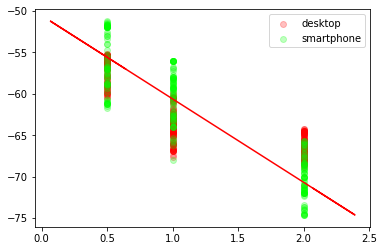

In [80]:
X = df_all['rollingMeanRssi'].values.reshape(-1,1)
y = df_all['distance'].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
Y_pred = reg.predict(X)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_desktop.distance, df_desktop.rollingMeanRssi, c='#ff00003f', label='desktop')
ax1.scatter(df_smartphone.distance, df_smartphone.rollingMeanRssi,c='#00ff003f', label='smartphone')
plt.plot(y_pred, X, color='red')
plt.legend(loc='upper right');
plt.show()

In [84]:
#For retrieving the slope:
print(reg.coef_)
#To retrieve the intercept:
print(reg.intercept_)

[[-0.09945619]]
[-5.02950614]


array([[1.93242739]])